# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Основные цели:

- Изучите время продажи квартиры.
- Изучить факторы, наиболее влияющие на стоимость квартиры?
- Создать топ 10 населённых пунктов с наибольшим числом объявлений.
- Выделить сегмент квартир в центре и изучить его.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Изучение данных из файла

In [2]:
import pandas as pd
data = pd.read_csv(r'C:\Users\danfe\Practicum projects\datasets\real_estate_data.csv', sep='\t')

first_data_len = len(data)

display(data)
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Всего датасет на 23699 строк. Пропущенные значения есть во многих столбцах: ceiling_height, floors_total, living_area, is_apartment и тд. Подробнее о заменах пропущенных значений и типов далее.

## Предобработка данных

Начнем с обработки пропусков. Для начала посмотрим, в каких столбцах наименьшее количество пропущенных значений. Это столбцы floors_total и locality_name. Так как эти данные достаточно критичны для нашего ислледования (от локации зависит цена и это очень важный параметр для категоризации, а общее количество этажей дает нам понять первый, последний или какой либо другой этаж у исследуемой квартиры), а общее количество пропусков незначительно по сравнению с обьемом столбцов, решаю удалить эти строки.

In [3]:
data = data.dropna(subset=['floors_total', 'locality_name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Теперь у нас 23565 строк. Зато столбцы floors_total и locality_name очищены от пропусков.

Следующий пропуск встречается в высоте потолков. Считаю разумным заменить пропуски на медианное значение столбца

In [4]:
# выполняем замену пустых при помощи .loc

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].median()

2.65

Медианное значение столбца - 2.65 метра, что выглядит очень реалистично

Следующий пропуск - размер жилой площади и кухонной площади. Давайте посмотрим, как соотносятся в наших данных средняя общая площадь со средней жилой площадью и со средней кухонной площадью.

In [5]:
living_area_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_area_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
print(living_area_ratio)
print(kitchen_area_ratio)

0.571173883860648
0.1750745989421607


В среднем жилая площадь составляет 0,57 от общей, а кухонная - 0,175. Сделаем замену пропусков в жилой и кухонной площади на значение общей площади, помноженной на наши коэффициенты, и округленных до первого числа после запятой.

In [6]:
data.loc[data['living_area'].isna(), 'living_area'] = round(
    data.loc[data['living_area'].isna(), 'total_area'] * living_area_ratio, 1
)

data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = round(
    data.loc[data['kitchen_area'].isna(), 'total_area'] * kitchen_area_ratio, 1
)

Следующие пропуски - is apartment. Примечательно, что значений в столбце не так много, пропущенных на порядки больше. Возникает гипотеза: все заполненные значения - случаи когда квартира является апартаментом. Проверим уникальные значения в столбце, чтобы проверить ее.

In [7]:
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Наша гипотеза не подтвердилась. Интересная ситуация - если заполнить все пропущенные значения значением False, то выборка жилых помещений будет составлять почти весь объем выборки против 50 значений у апартаментов, а как следствие - их сравнение будет некорректным в связи с различающимися на многие порядки объемами. Принимаю решение удалить столбец is apartment как бесполезный в дальнейшем исследовании.

In [8]:
data.pop('is_apartment')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   studio                23565 non-null  bool   
 10  open_plan             23565 non-null  bool   
 11  kitchen_area          23565 non-null  float64
 12  balcony               12090 non-null  float64
 13  locality_name         23565 non-null  object 
 14  airports_nearest      18041 non-null  float64
 15  cityCenters_nearest

Заполним пропуски в графе балконов значением 0, так как можно предположить, что пропуск в этом столбце означает отсутствие балконов.

In [9]:
data.loc[data['balcony'].isna(), 'balcony'] = 0
data['balcony'].value_counts()

0.0    15155
1.0     4187
2.0     3656
5.0      304
4.0      182
3.0       81
Name: balcony, dtype: int64

Заполним пропуски в дистанции до аэропорта медианным значением (в Ленинградской области 1 аэропорт, поэтому заполнение медианной не сильно исказит данные)

In [10]:
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].median()

Теперь заменим пропуски в days_exposition на разницу между наибольшим значением даты выставления (будем считать ее датой выгрузки данных) и датой выставления конкретной строки.

Для начала заменим время в first_day_exposition на тип datetime

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Теперь заполним пропуски в days_exposition

In [12]:
print(data['days_exposition'])
data.loc[data['days_exposition'].isna(), 'days_exposition'] = (data['first_day_exposition'].max() - data['first_day_exposition']).dt.days
print(data['days_exposition'])

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23565, dtype: float64
0         57.0
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694    773.0
23695     45.0
23696    446.0
23697    602.0
23698    651.0
Name: days_exposition, Length: 23565, dtype: float64


Заполнять столбцы с парками, прудами и центрами лучше всего на этапе анализа, так как пока идей для замены пропусков не возникает, для начала лучше всего будет ознакомиться с данными.

Также лучше изменить значения в графе *last_price* на тысячи рублей, для облегчения дальнейшого анализа

In [13]:
data['last_price'] = data['last_price'] / 1000

Проверим долю удаленных записей.

In [14]:
final_data_len = len(data)

print(1 - final_data_len / first_data_len)

0.005654247014642011


Теперь перейдем к изменению типов данных.

floors_total должен быть целочисленным. Убедимся что значения в нем именно такие.

In [15]:
data['floors_total'].value_counts()

5.0     5775
9.0     3758
16.0    1375
12.0    1361
4.0     1193
10.0    1174
25.0    1075
6.0      910
17.0     833
3.0      667
7.0      589
14.0     553
18.0     505
24.0     462
8.0      388
2.0      381
15.0     365
23.0     349
19.0     339
22.0     286
20.0     271
13.0     229
11.0     202
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

Как мы видим, все значения целочисленные, как и должны быть. Заменим их тип на int

In [16]:
data['floors_total'] = data['floors_total'].astype('int')

Заменим количество балконов и дни выставления на продажу на int.

In [17]:
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   studio                23565 non-null  bool          
 10  open_plan             23565 non-null  bool          
 11  kitchen_area          23565 non-null  float64       
 12  balcony               23565 non-null  int32         
 13  locality_name   

Остались значения количества парков, водоемов и дней на продаже, но в этих значениях содержатся пропуски, поэтому тип заменять пока не будем.

Теперь обработаем явные дубликаты значений.

In [18]:
print(data.duplicated().sum())

0


Дубликатов не обнаружено. Это здорово, предобработку можно на этом завершить.

### Вывод

Были удалены строки с пустыми значениями в *floors_total* и *locality_name*. Пропуски в *celling_height*, *airoports_nearest* были заменены на медиану. Пропуски в *living_area* и *kitchen_area* были заменены значениями, приближенными к средним значениям соотношения к общей площади. Пропуски в *days_exposition* заменены разницей между максимальным днем выставления и днем выставления для строки. Был удален столбец *is_apartment*, и заменены типы данных.

## Расчёты и добавление результатов в таблицу

Начнем с добавления цены квадратного метра, округленного до первого числа после запятой

In [19]:
data['sq_metre_cost'] = round(data['last_price'] / data['total_area'], 1)
data['sq_metre_cost']

0        120.4
1         82.9
2         92.8
3        408.2
4        100.0
         ...  
23694     72.5
23695     52.5
23696     44.1
23697    149.5
23698     41.8
Name: sq_metre_cost, Length: 23565, dtype: float64

Теперь добавим столбцы с днем, месяцем и годом публикации

In [20]:
data['day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).day
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

Сделаем категоризацию этажей

In [21]:
def floor_categoriser(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_category'] = data.apply(floor_categoriser, axis = 1)

И наконец добавим отношение жилой и кухонной площади к общей

In [22]:
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 2)

display(data[[
    'sq_metre_cost',
    'day_exposition',
    'month_exposition',
    'year_exposition',
    'floor_category',
    'living_area_ratio',
    'kitchen_area_ratio'
]])

,sq_metre_cost,day_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
0,120.4,7,3,2019,другой,0.47,0.23
1,82.9,4,12,2018,первый,0.46,0.27
2,92.8,20,8,2015,другой,0.61,0.15
3,408.2,24,7,2015,другой,0.57,0.17
4,100.0,19,6,2018,другой,0.32,0.41
...,...,...,...,...,...,...,...
23694,72.5,21,3,2017,другой,0.55,0.10
23695,52.5,15,1,2018,другой,0.64,0.14
23696,44.1,11,2,2018,первый,0.52,0.17
23697,149.5,28,3,2017,другой,0.57,0.30


Все новые столбцы на месте, можно приступать к исследованию

### Вывод

Были добавлены новые столбцы с ценой квадратного метра, днем, месяцем и годом публикации, категорией этажа, и коэффициентами жилой и кухонной площади.

## Исследовательский анализ данных

**Перейдем к анализу выбивающихся значений.**

Считать выбивающимися значениями буду все, что выходит за пределы 1,5IQR вниз от 25 перцентиля и вверх от 75 перцентиля. Отфильтруем наши данные по нескольким столбцам: площадь, цена, высота потолков, цена за квадратный метр, число комнат.

In [23]:
filter_cols = ['total_area', 'ceiling_height', 'sq_metre_cost', 'rooms', 'last_price']

for col in filter_cols:
    iqr = np.percentile(a=data[col], q=75) - np.percentile(a=data[col], q=25)
    low_border = np.percentile(a=data[col], q=25) - 1.5*iqr
    high_border = np.percentile(a=data[col], q=75) + 1.5*iqr
    filtered_data = data[(data[col] >= low_border)&(data[col] <= high_border)]
    
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21519 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21519 non-null  int64         
 1   last_price            21519 non-null  float64       
 2   total_area            21519 non-null  float64       
 3   first_day_exposition  21519 non-null  datetime64[ns]
 4   rooms                 21519 non-null  int64         
 5   ceiling_height        21519 non-null  float64       
 6   floors_total          21519 non-null  int32         
 7   living_area           21519 non-null  float64       
 8   floor                 21519 non-null  int64         
 9   studio                21519 non-null  bool          
 10  open_plan             21519 non-null  bool          
 11  kitchen_area          21519 non-null  float64       
 12  balcony               21519 non-null  int32         
 13  locality_name   

Мы получили 21519 строк, то есть срезали около 8.7% имеющихся данных. Зато теперь мы имеем дело с самыми типичными обьявлениями, данные в которых не вызывают недоверия, как высота потолков в 100 метров.

**Начнем с анализа площади, цены, числа комнат, высоты потолков.** 

Изучим разброс наших данных, характерные значения и построим графики.

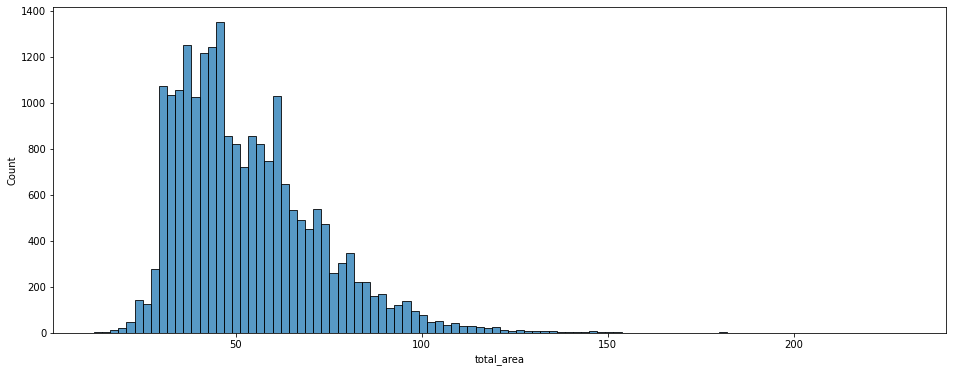

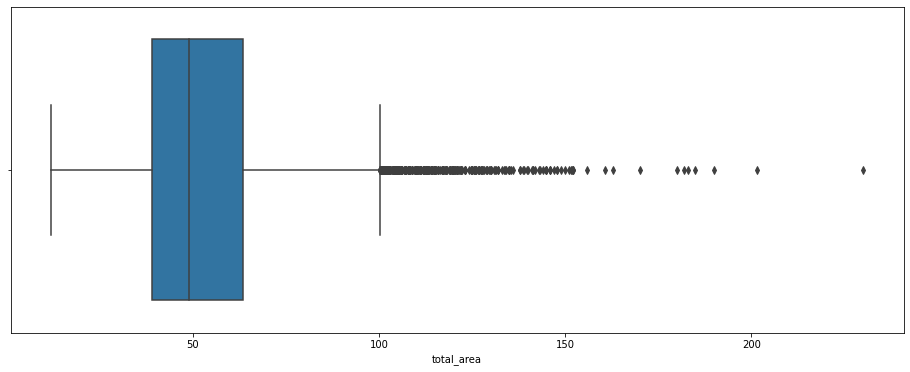

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


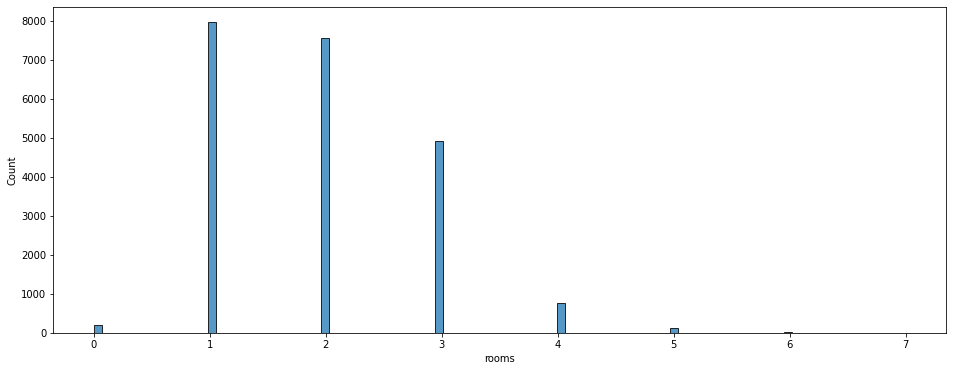

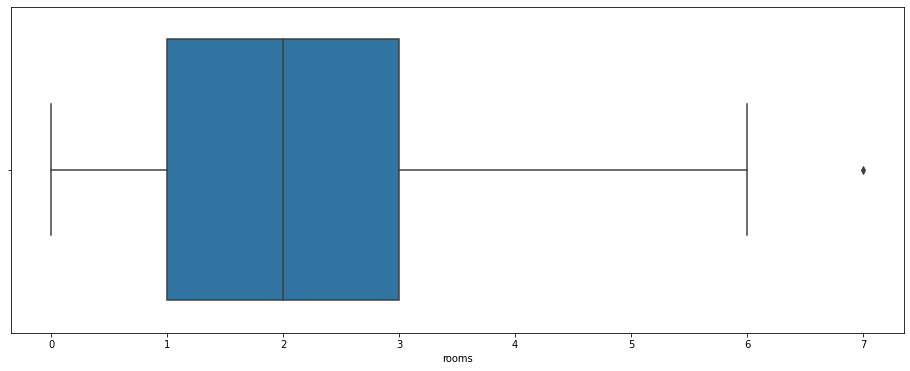

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


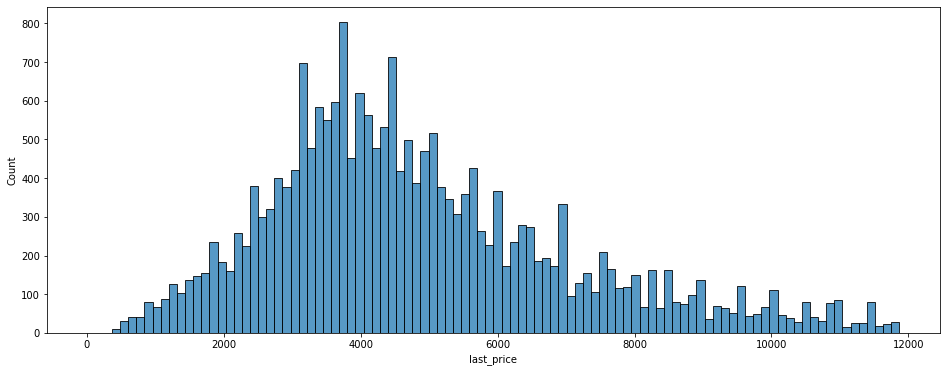

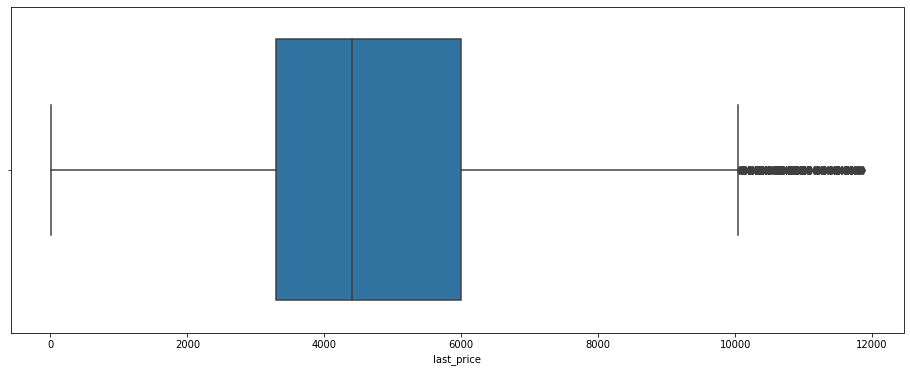

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64


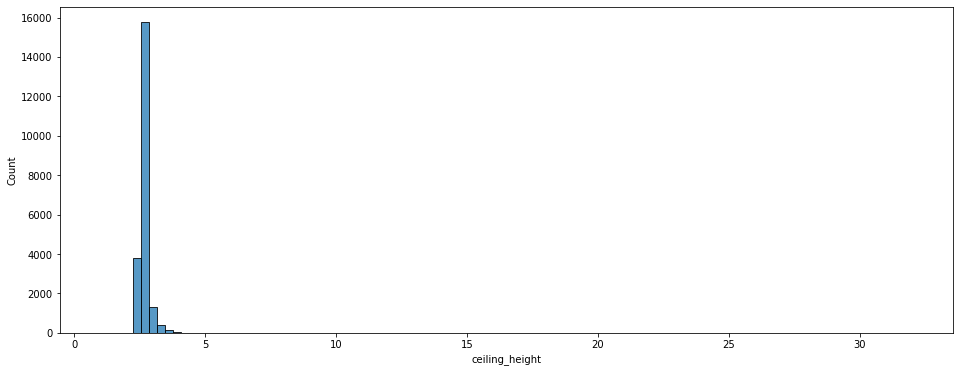

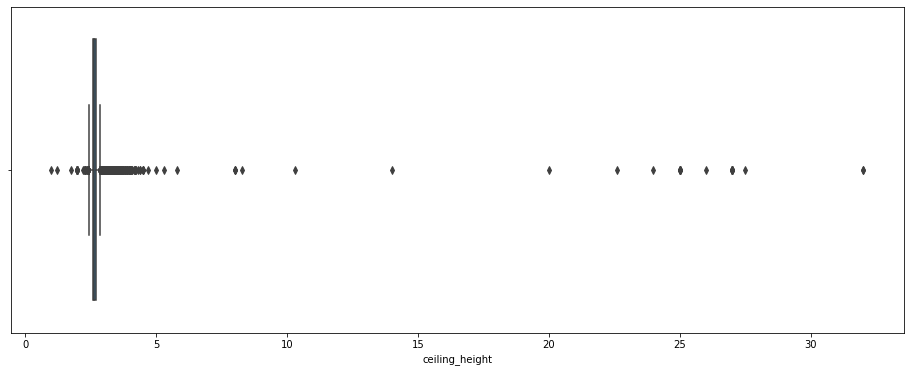

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


In [24]:
cols_1 = ['total_area', 'rooms', 'last_price', 'ceiling_height']

for col in cols_1:
    plt.figure(figsize=(16, 6))
    sns.histplot(data=filtered_data, x=col, bins=100, label=col)
    plt.show()
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=filtered_data, x=col)
    plt.show()
    print(data[col].describe())

Как мы видим, гистограммы во всех случаях получились достаточно наглядными. Единственное исключение - боксплот высоты потолков. Значения высоты потолков выше 5-10 метров считаю крайне нереалистичными, от таких строк при анализе лучше отказаться.

По нашим диаграммам мы видим, что типичные значения площади квартир - порядка 50 метров, но есть достаточно длинный хвост за значения выше 100. 

По комнатам - типичное значение - от 1 до 3, 4 и выше встречаются достаточно редко.

Типичная цена квартир - около 4 млн рублей, но опять есть длинный хвост за значения 6 млн и выше

Наиболее типичная высота потолков - 2,65 метра, опять же есть длинный хвост, выглядящий очень нереалистичным (сложно представить квартиру с высотой потолков в 30 метров)

Теперь перейдем к анализу времени продажи. Нас интересует столбец days_exposition.


Медианное время продажи = 90.0 
Среднее время продажи = 174.8052883498304.



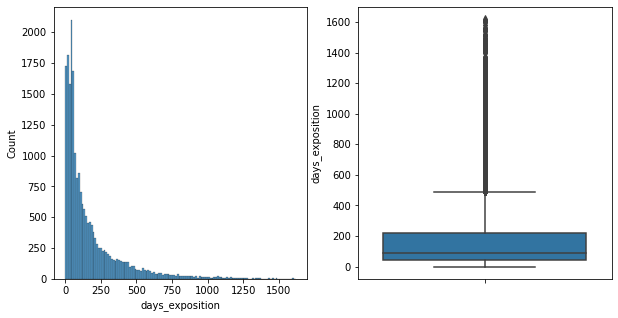

In [25]:
fig = plt.figure(figsize=(10,5)) # создаем области для рисования в matplotlib
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.histplot(data=filtered_data, x='days_exposition', ax=ax1) # строим графики рядом друг с другом
sns.boxplot(data=filtered_data, y='days_exposition', ax=ax2)

print(f'''
Медианное время продажи = {filtered_data['days_exposition'].median()} 
Среднее время продажи = {filtered_data['days_exposition'].mean()}.
''')

Мы видим, что большая часть обьявлений висела в продаже до 500 дней, все что выше, можно считать выбросами. В целом, это адекватная оценка времени продажи, было бы странным обьявление о продаже активное более 2х лет. При этом медиана нашего столбца = 90 дням (3 месяца), а среднее значение = 174 дня (около 6 месяцев), что более чем укладывается в реальное положение вещей. Считаю данные в этом столбце заслуживающими доверия. 

Теперь разберемся с аномально долгими и аномально быстрыми продажами. За такие значения возьму по 5% минимальных и максимальных значений данного столбца

In [26]:
np.percentile(a=filtered_data['days_exposition'], q=[5, 95])

array([  8., 626.])

Таким образом, аномально быстрыми продажами можно считать обьявления, активные менее 8 дней, а аномально долгими - более 626 дней.

**Переходим к оценке зависимостей цены от следующих параметров: площадь, число комнат, этажа и удаленности от центра.**

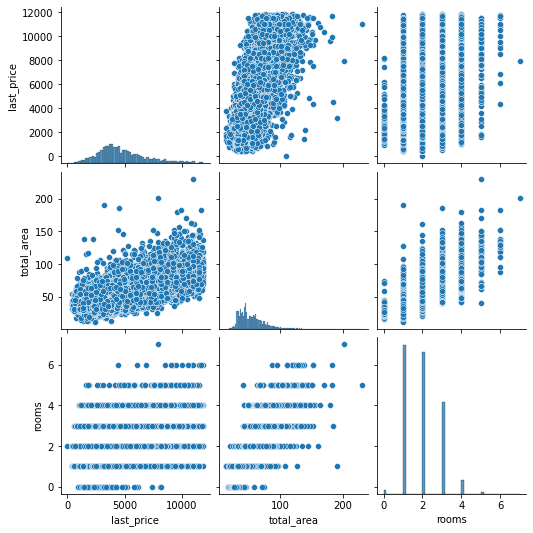

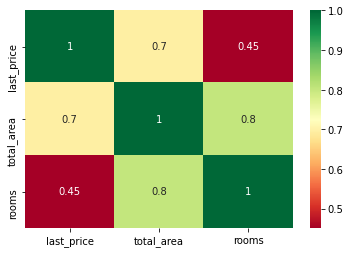

In [27]:
cols = ['last_price', 'total_area', 'rooms', 'floor_category']

analysis_data = filtered_data[cols]

sns.pairplot(analysis_data)
plt.show()

sns.heatmap(analysis_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

Из построенных диаграмм рассеяния и тепловой карты видно, что имеется заметная положительная корреляция цены от общей площади (что логично), и не такая заметная, но тоже значительная корреляция цены от количества комнат. Теперь посмотрим на график корреляции цены в зависимости от категории

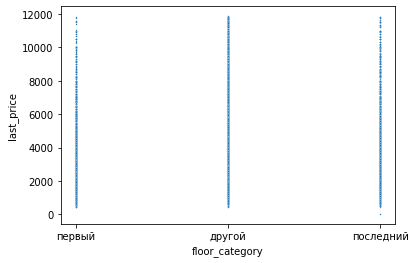

In [28]:
sns.scatterplot(data=analysis_data, y='last_price', x='floor_category', s=2)
plt.show()

Не самый наглядный график, но по нему видно, что начальная стоимость квартир на последнем этаже несколько выше, чем на первом, а также то, что дорогих квартир на первом этаже в среднем поменьше, чем дорогих квартир на последнем, но в общем и целом, заметной корреляции нет - дешевые квартиры, как и дорогие могут распологаться на любом этаже.

Перейдем к анализу зависимости от удаленности от центра. Так как в этом столбце имеются пропуски, а заполнять их каким то значением значит искажать данные, буду оценивать зависимость только на тех строках, где это поле заполнено. Для начала посмотрим, сколько таких строк в наших очищенных данных.

In [29]:
filtered_cityCenters_data = filtered_data[filtered_data['cityCenters_nearest'].isnull() == False]
display(filtered_cityCenters_data)
filtered_cityCenters_data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_around3000,ponds_nearest,days_exposition,sq_metre_cost,day_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio
1,7,3350.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81,82.9,4,12,2018,первый,0.46,0.27
2,10,5196.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558,92.8,20,8,2015,другой,0.61,0.15
4,2,10000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100.0,19,6,2018,другой,0.32,0.41
6,6,3700.0,37.30,2017-11-02,1,2.65,26,10.6,6,False,...,0.0,NaN,155,99.2,2,11,2017,другой,0.28,0.39
7,5,7915.0,71.60,2019-04-18,2,2.65,24,40.9,22,False,...,0.0,NaN,15,110.5,18,4,2019,другой,0.57,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,...,0.0,NaN,15,105.8,19,7,2018,другой,0.60,0.12
23691,11,9470.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,1.0,806.0,519,129.9,13,10,2016,другой,0.55,0.15
23693,9,4600.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,1.0,675.0,239,73.7,5,8,2016,другой,0.64,0.13
23694,9,9700.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,3.0,381.0,773,72.5,21,3,2017,другой,0.55,0.10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16046 entries, 1 to 23697
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          16046 non-null  int64         
 1   last_price            16046 non-null  float64       
 2   total_area            16046 non-null  float64       
 3   first_day_exposition  16046 non-null  datetime64[ns]
 4   rooms                 16046 non-null  int64         
 5   ceiling_height        16046 non-null  float64       
 6   floors_total          16046 non-null  int32         
 7   living_area           16046 non-null  float64       
 8   floor                 16046 non-null  int64         
 9   studio                16046 non-null  bool          
 10  open_plan             16046 non-null  bool          
 11  kitchen_area          16046 non-null  float64       
 12  balcony               16046 non-null  int32         
 13  locality_name   

Всего таких строк 16046 - достаточное количество для анализа.

Построим диаграмму рассеяния и найдем числовой параметр корреляции нашей цены от расстояния до центра.

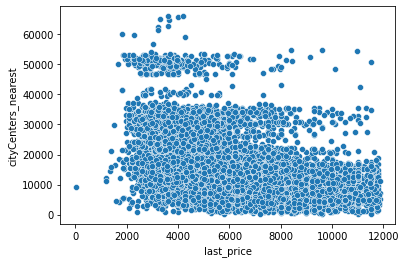

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,-0.344927
last_price,-0.344927,1.000000


In [30]:
sns.scatterplot(data=filtered_cityCenters_data, y='cityCenters_nearest', x='last_price')
plt.show()

filtered_cityCenters_data[['cityCenters_nearest', 'last_price']].corr()

Ожидаемый результат - мы получили отрицательную корреляцию. Действительно, с удалением от центра квартиры становятся дешевле. Однако наши показатели коррелируют очень слабо. Вероятно, это вызвано тем, что в датафрейме множество небольших населенных пунктов, растояние до центра в которых указано до центра Санкт-Петербурга.

Перейдем к анализу зависимости цены от даты размещения. Сомневаюсь, что тут будет хоть какая то значимая корреляция.

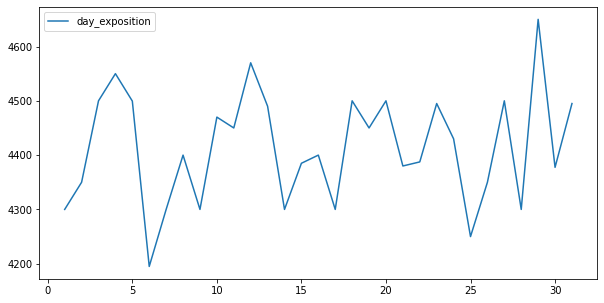

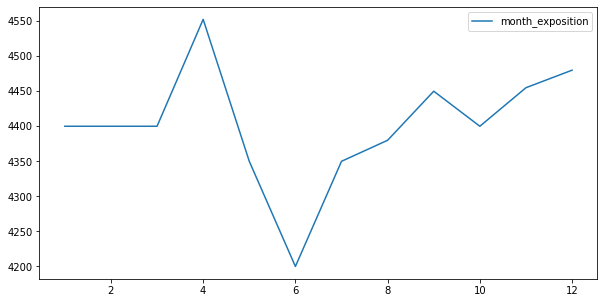

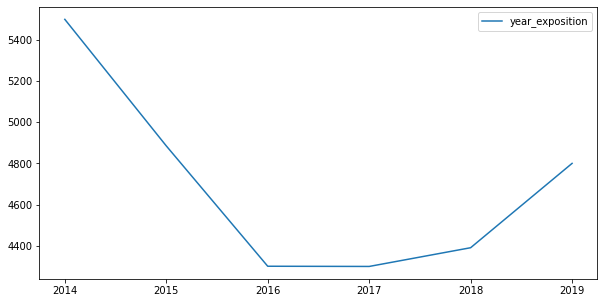

In [31]:
times = ['day_exposition', 'month_exposition', 'year_exposition']

for time in times:
    x_axis = np.sort(filtered_data[time].unique())
    y_axis = []
    for x_i in x_axis:
        y_axis.append(filtered_data.loc[filtered_data[time] == x_i, 'last_price'].median())
    plt.figure(figsize=(10,5))
    sns.lineplot(x=x_axis, y=y_axis, label=time)
    plt.show()

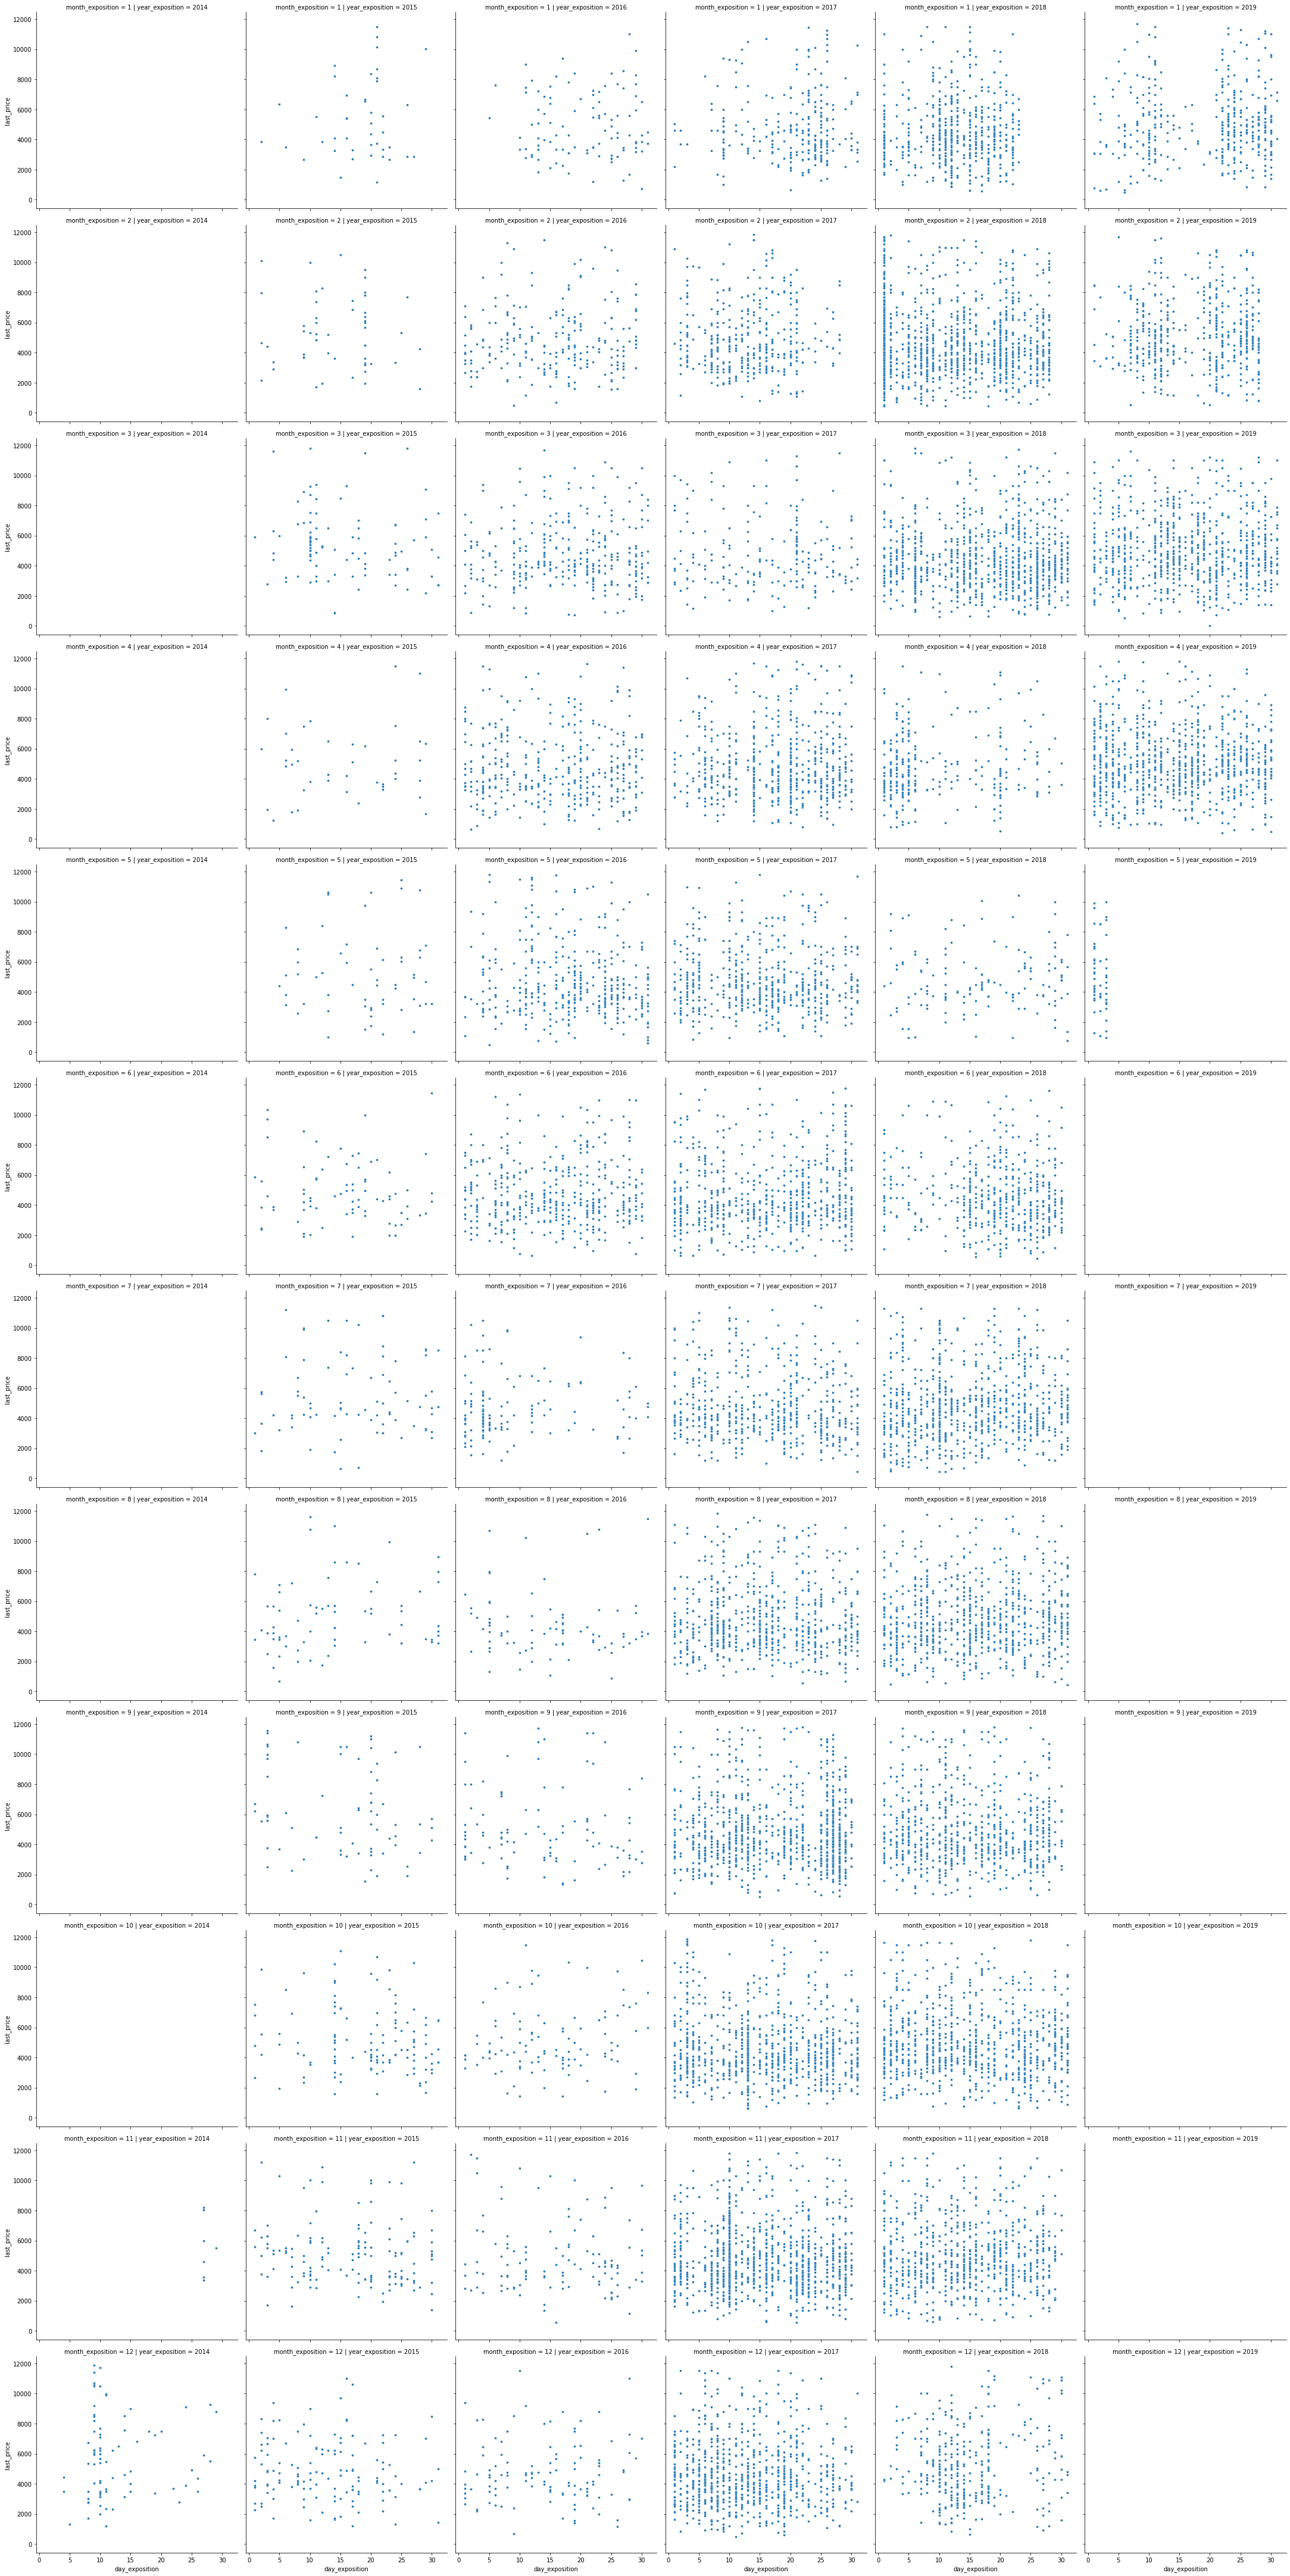

In [32]:
sns.relplot(data=filtered_data, x='day_exposition', y='last_price', row='month_exposition', col='year_exposition', s=15)
plt.show()

Как и ожидалось, никаких явных корреляций не обнаружено, разброс значений на медианных графиках очень незначительный. Однако стоит заметить, что:
1) Медианное значение цены выставяемых летом квартир несколько ниже, чем в другие времена года

2) Наблюдается устойчивое снижение медианной цены с 14 по 16 год и рост с 17 по 19.

3) Отдельно выделяются некоторые аномальные дни в частоте публикаций обьявлений, например день в начальной половине ноября 17 года, самое начало февраля 18 года. Было бы интересно узнать, чем примечательны эти дни, что в них число публикаций значительно росло

**Переходим к анализу самых густонаселенных пунктов.**

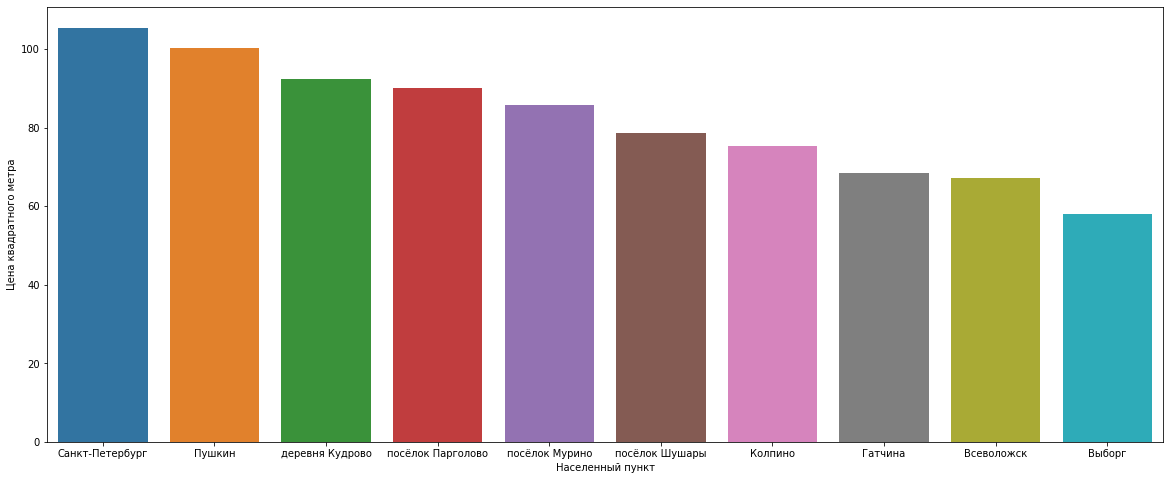

In [33]:
wanted_localities = filtered_data['locality_name'].value_counts().to_frame().head(10).index #получаем список населенных пунктов

most_crowded_data = filtered_data.query('locality_name in @wanted_localities') #создаем датафрейм с этими пунктами

mean_cost_by_location = [] #начинаем построение графика - для начала список со средней ценой квадратного метра для каждого населенного пункта
for location in wanted_localities:
    mean_cost_by_location.append(most_crowded_data.loc[most_crowded_data['locality_name'] == location, 'sq_metre_cost'].mean()) #добавляем в список среднюю цену квадратного метра по каждому населенному пункту

df = pd.DataFrame({"Населенный пункт":wanted_localities,
                  "Цена квадратного метра":mean_cost_by_location}).sort_values('Цена квадратного метра', ascending=False)

plt.figure(figsize=(20,8))
sns.barplot(data=df, x="Населенный пункт", y="Цена квадратного метра")
plt.show()

Таким образом, самая высокая цена за квадратный метр - в Питере, около 100 с небольшим тысяч рублей за квадратный метр. Самая низкая - в Выборге, чуть ниже 60 тыс рублей за квадрат.

**Перейдем к анализу квартир в центре Питера**

Для начала выделим такие квартиры. Для этого построим график зависимости цены от расстояния от центра, и где график будет сильно меняться - там и будет граница центра

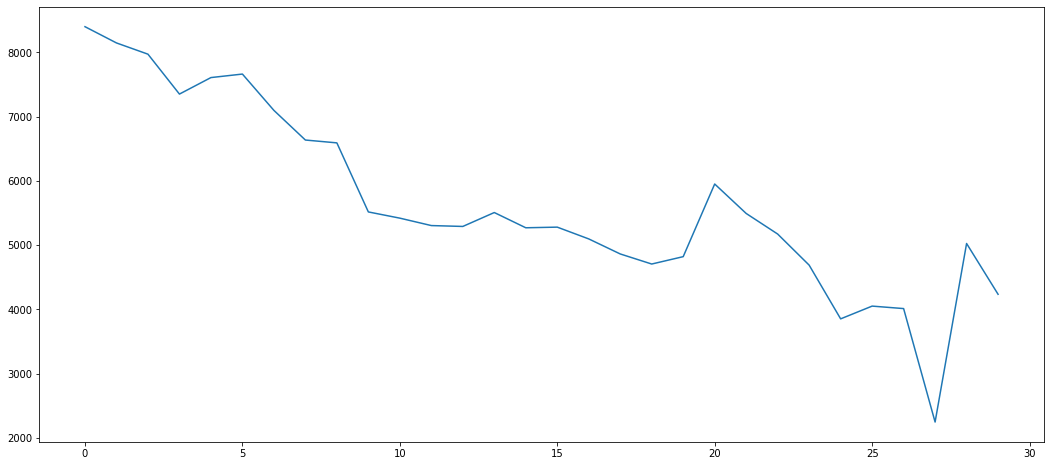

In [34]:
piter_data = filtered_data[filtered_data['locality_name'] == 'Санкт-Петербург'] # фильтруем по городу
piter_data = piter_data[piter_data['cityCenters_nearest'].isnull() == False] # берем строки где заполнена графа расстояния до центра

piter_data['to_center_km'] = round(piter_data['cityCenters_nearest'] / 1000, 0)

kilometres = sorted(piter_data['to_center_km'].unique())

mean_price_for_km = []
for km in kilometres:
    mean_price_for_km.append(piter_data.loc[piter_data['to_center_km'] == km, 'last_price'].mean())
    
plt.figure(figsize=(18,8))
sns.lineplot(x=kilometres, y=mean_price_for_km)
plt.show()

На графике видно, что после 5 км от центра начинается достаточно резкое и устойчивое падение. Значит граница центра будет на значении 5км.

**Переходим к анализу квартир в центре**

In [35]:
center_data = piter_data.query('to_center_km <= 5')
display(center_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_nearest,days_exposition,sq_metre_cost,day_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio,to_center_km
24,8,6500.0,97.20,2015-10-31,2,2.65,3,46.5,1,False,...,124.0,265,66.9,31,10,2015,первый,0.48,0.20,2.0
61,18,7990.0,74.00,2017-08-24,2,2.65,4,43.0,4,False,...,NaN,609,108.0,24,8,2017,последний,0.58,0.27,4.0
99,32,9600.0,90.00,2017-09-26,4,2.65,5,67.0,2,False,...,NaN,104,106.7,26,9,2017,другой,0.74,0.09,3.0
136,16,6500.0,51.80,2018-08-01,2,3.45,6,25.6,2,False,...,812.0,163,125.5,1,8,2018,другой,0.49,0.14,4.0
138,8,4800.0,40.00,2017-11-18,2,2.65,3,29.0,2,False,...,729.0,80,120.0,18,11,2017,другой,0.72,0.15,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23648,14,10100.0,78.00,2017-05-12,3,3.27,5,48.6,5,False,...,117.0,621,129.5,12,5,2017,последний,0.62,0.11,1.0
23664,5,9000.0,110.00,2015-12-10,4,3.36,7,64.6,5,False,...,118.0,816,81.8,10,12,2015,другой,0.59,0.14,5.0
23665,11,4250.0,47.00,2016-05-20,1,2.65,6,18.2,1,False,...,519.0,131,90.4,20,5,2016,первый,0.39,0.31,5.0
23691,11,9470.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,806.0,519,129.9,13,10,2016,другой,0.55,0.15,4.0


В датасете по центру города у нас 1597 строк

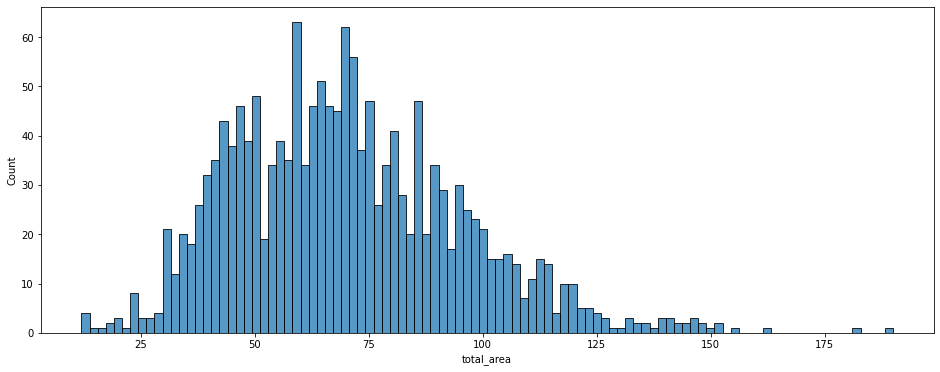

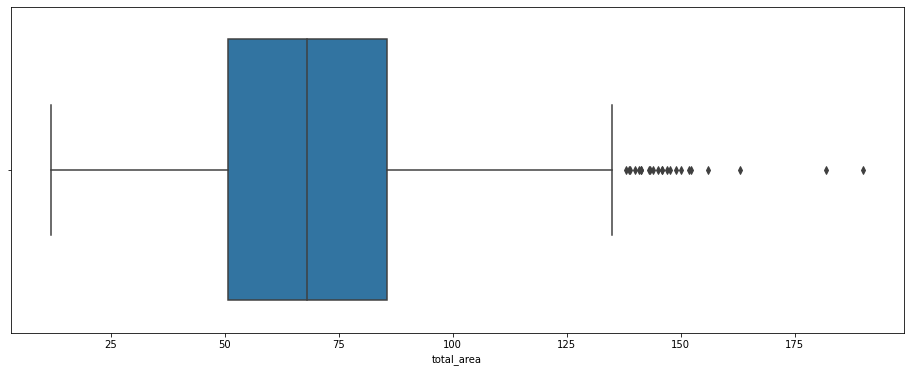

count    1597.000000
mean       70.240570
std        25.035698
min        12.000000
25%        50.700000
50%        68.000000
75%        85.600000
max       190.000000
Name: total_area, dtype: float64


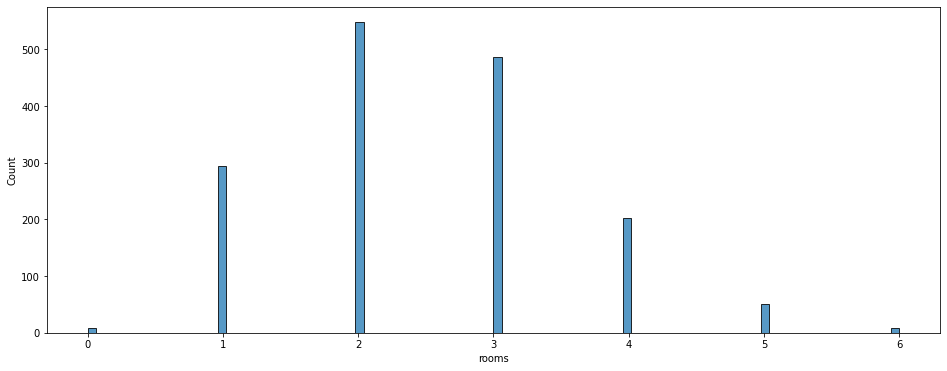

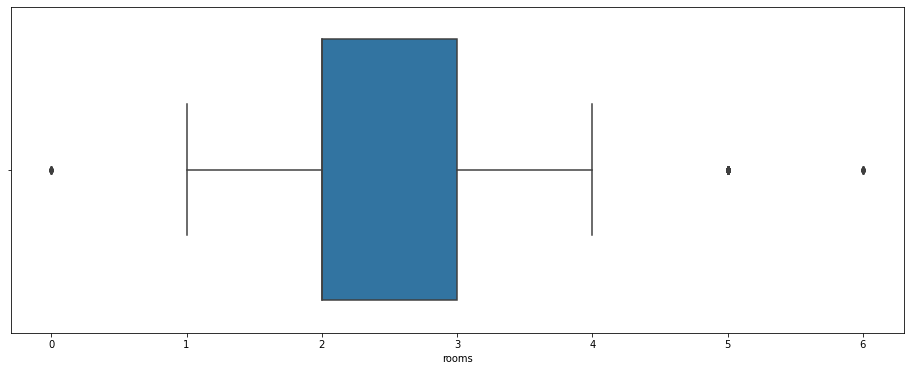

count    1597.000000
mean        2.477771
std         1.072106
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


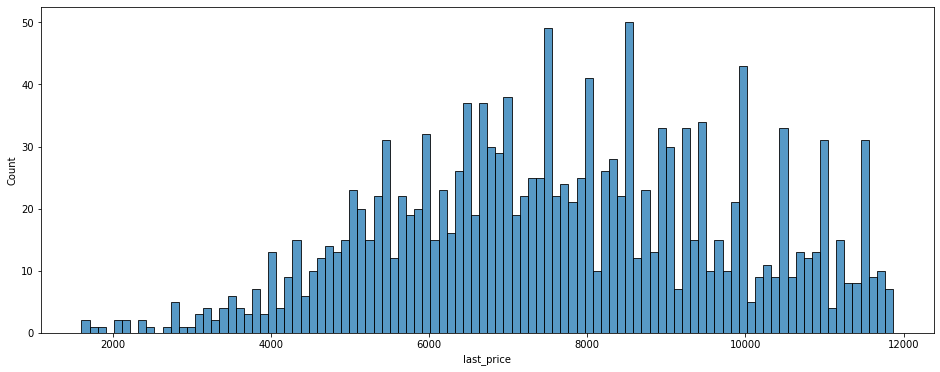

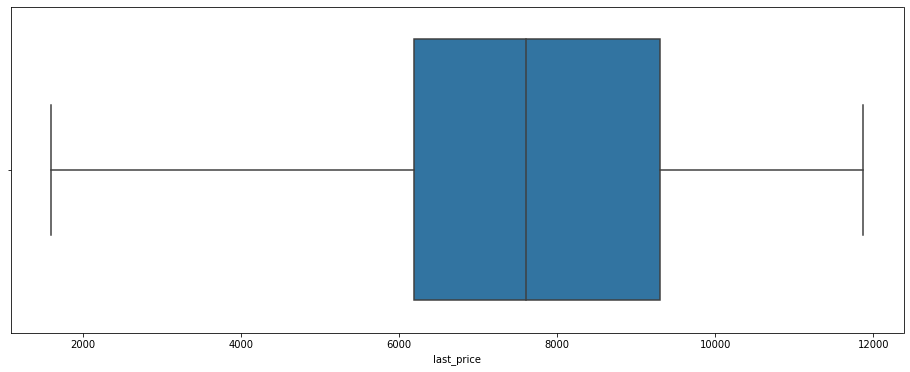

count     1597.000000
mean      7667.505429
std       2126.760586
min       1600.000000
25%       6190.000000
50%       7600.000000
75%       9300.000000
max      11866.860000
Name: last_price, dtype: float64


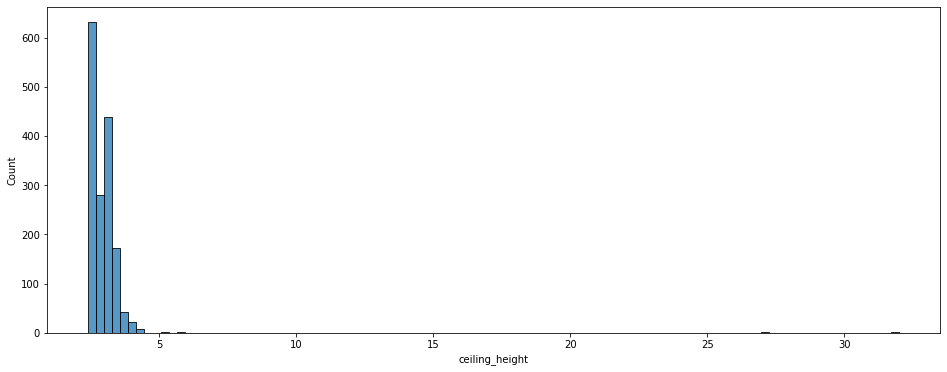

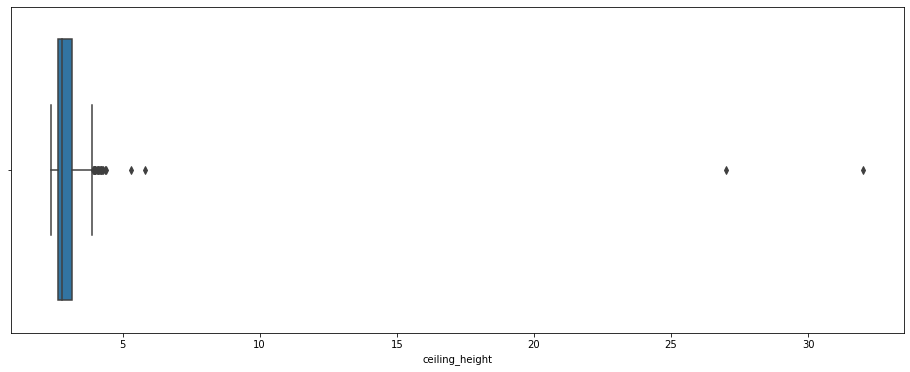

count    1597.000000
mean        2.965654
std         1.006070
min         2.400000
25%         2.650000
50%         2.800000
75%         3.150000
max        32.000000
Name: ceiling_height, dtype: float64


In [36]:
for col in cols_1:
    plt.figure(figsize=(16, 6))
    sns.histplot(data=center_data, x=col, bins=100, label=col)
    plt.show()
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=center_data, x=col)
    plt.show()
    print(center_data[col].describe())

По нашим гистограммам видно, что квартиры в центре в среднем имеют больший метраж, чем обычно. Медианное значение здесь 68 метров, но наблюдается очень значительное количество квартир с метражом более 100 метров.

Наиболее популярное количество комнат здесь - 2, но присутсвует значительное количество обьявлений с 3-6 комнатами, значительно больше, чем в среднем по датасету.

Гистограмма цен явно смещена вправо, медианное значение цены - 7,6 млн, но приствует значительное количество обьявлений с ценой выше 10 млн. Стоит заметить характерные пики около круглых цен.

Высота потолков же значительно не отличается от среднего по городу, наблюдается большое количество квартир с "высокими" потолками, но распределения похожи

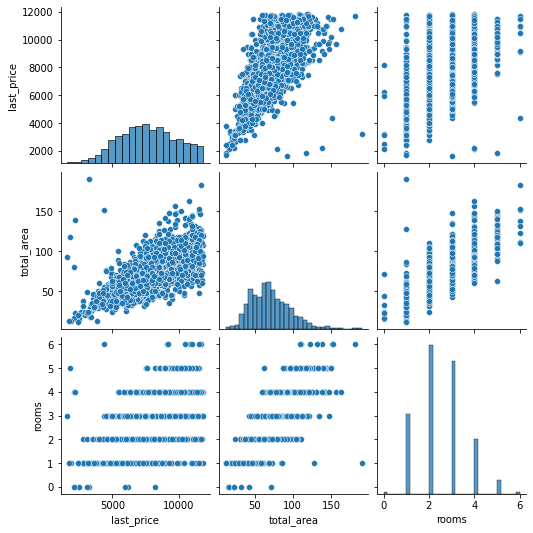

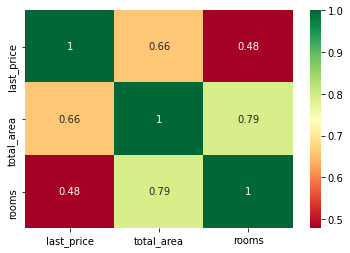

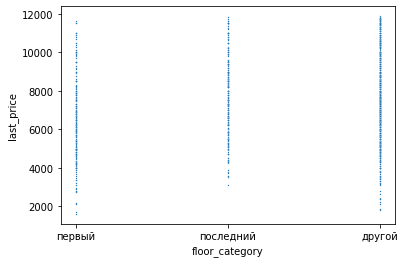

In [37]:
cols = ['last_price', 'total_area', 'rooms', 'floor_category']

analysis_data = center_data[cols]

sns.pairplot(analysis_data)
plt.show()

sns.heatmap(analysis_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

sns.scatterplot(data=analysis_data, y='last_price', x='floor_category', s=2)
plt.show()

Также, как и в целом по датасету, присутствует корреляция между ценой - площадью и ценой - количеством комнат, однако тут она чуть менее заметна. Можно эту разницу списать на погрешность от меньшей выборки. Зависимость от этажа сохраняется прежней.

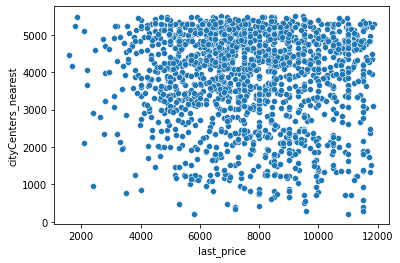

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,-0.053337
last_price,-0.053337,1.000000


In [38]:
sns.scatterplot(data=center_data, y='cityCenters_nearest', x='last_price')
plt.show()

center_data[['cityCenters_nearest', 'last_price']].corr()

Зависимости от расстояния до центра для центрального региона обнаружено не было. Значение корреляции близко к нулю, это подтверждается видом нашей диаграммы рассеивания.

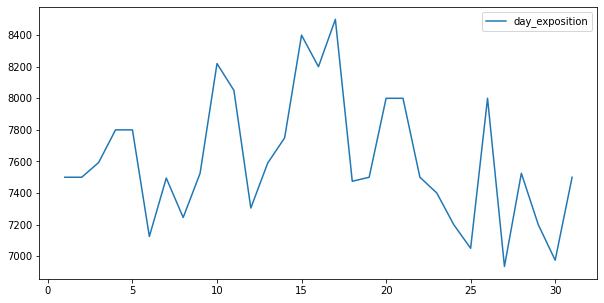

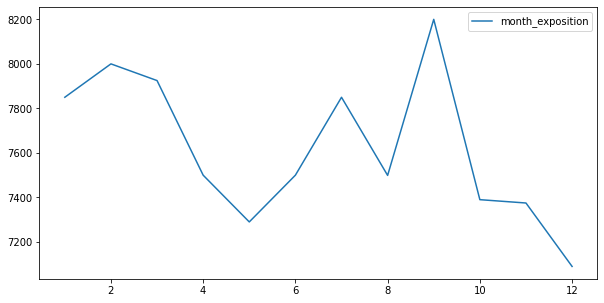

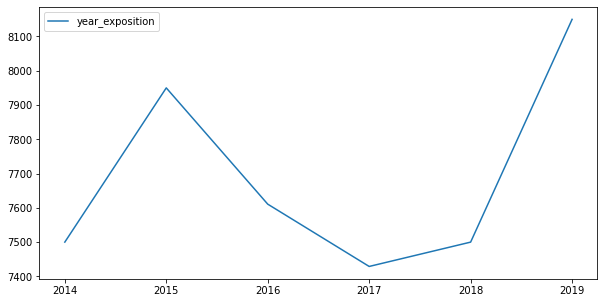

In [39]:
for time in times:
    x_axis = np.sort(center_data[time].unique())
    y_axis = []
    for x_i in x_axis:
        y_axis.append(center_data.loc[filtered_data[time] == x_i, 'last_price'].median())
    plt.figure(figsize=(10,5))
    sns.lineplot(x=x_axis, y=y_axis, label=time)
    plt.show()

Зависимости от даты размещения тоже. Примечательно, что в отличие от общего датасета, цена квартир в центре вела себя несколько иначе, и на 19 год медиана значительно выше чем в 14 году. От этого можно сделать интересные (и весьма грустные) выводы о том, как кризисы влияют на разные группы населения в нашей стране.

## Общий вывод

В работе было была выполнена предобработка данных, датафрейм очищен от пропусков и ненужных столбцов, было выполнено изменение типов данных. Были добавлены новые столбцы с ценой квадратного метра, днем, месяцем и годом публикации, категорией этажа, и коэффициентами жилой и кухонной площади. 

Были изучены основные параметры объявлений, построены гистограммы, найдены корреляционные зависимости между параметрами. Изучены типичные сроки продажи квартир, найдены аномалии. Убраны строки с аномальными значениями. Найдены населенные пункты с наиболее и наименее дорогими квартирами, выделены отдельно квариры в центре Санкт-Петербурга и изучены параметры и корреляции для них.